# Proyek Analisis Data : Air-Quality-Dataset
- Nama : Juan Christopher Young
- Email : juanyoung41@gmail.com
- id Dicoding : fels_12

#### Dataset yang digunakan 
- Aotizhongxin
- Changping
- Dingling
- Gucheng
- Guanyuan

# Menentukan Pertanyaan Bisnis

- Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015?
- Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Aotizhongxin?
- Apakah terdapat korelasi antara N02 terhadap SO2?

# Import Library yang dibutuhkan untuk Proses Analisa Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

NumPy version: 1.24.3
Pandas version: 2.1.1
Seaborn version: 0.13.0


# Data Wrangling

### Gathering Data

In [3]:
Aotizhongxin_df = pd.read_csv("data\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
Changping_df = pd.read_csv("data\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
Dingling_df = pd.read_csv("data\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Dingling_20130301-20170228.csv")
Dingling_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
Guanyuan_df = pd.read_csv("data\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Guanyuan_20130301-20170228.csv")
Guanyuan_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [7]:
Gucheng_df = pd.read_csv("data\Air-quality-dataset\PRSA_Data_20130301-20170228\PRSA_Data_Gucheng_20130301-20170228.csv")
Gucheng_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assesing Data

##### Menilai Info dari masing - masing dataset

In [8]:
print(Aotizhongxin_df.info(),"\n")
print(Changping_df.info(),"\n")
print(Dingling_df.info(),"\n")
print(Guanyuan_df.info(),"\n")
print(Gucheng_df.info(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entri

##### Cek Apakah Terdapat Data Null atau Na pada setiap dataframe

In [9]:
print("Jumlah Data Null pada dataframe Aotizhongxin_df :\n",Aotizhongxin_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Changping_df :\n",Changping_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Dingling_df :\n",Dingling_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Guanyuan_df :\n",Guanyuan_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Gucheng_df :\n",Gucheng_df.isna().sum(),"\n")

Jumlah Data Null pada dataframe Aotizhongxin_df :
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64 

Jumlah Data Null pada dataframe Changping_df :
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64 

Jumlah Data Null pada dataframe Dingling_df :
 No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd      

##### Cek duplikasi data pada masing masing dataframe

In [10]:
print("Jumlah Duplicated data pada dataframe Aotizhongxin_df : ",Aotizhongxin_df.duplicated().sum())
print("Jumlah Duplicated data pada dataframe Changping_df : ",Changping_df.duplicated().sum())
print("Jumlah Duplicated data pada dataframe Dingling_df : ",Dingling_df.duplicated().sum())
print("Jumlah Duplicated data pada dataframe Guanyuan_df : ",Guanyuan_df.duplicated().sum())
print("Jumlah Duplicated data pada dataframe Gucheng_df : ",Gucheng_df.duplicated().sum())

Jumlah Duplicated data pada dataframe Aotizhongxin_df :  0
Jumlah Duplicated data pada dataframe Changping_df :  0
Jumlah Duplicated data pada dataframe Dingling_df :  0
Jumlah Duplicated data pada dataframe Guanyuan_df :  0
Jumlah Duplicated data pada dataframe Gucheng_df :  0


##### Statistik dari masing masing dataframe

In [11]:
Aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [12]:
Changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [13]:
Dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [14]:
Guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [15]:
Gucheng_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


##### Jumlah data non-unique dari masing masing dataset

In [16]:
print("Aotizhongxin_df \n", Aotizhongxin_df.nunique(),"\n")
print("Changping_df \n", Changping_df.nunique(),"\n")
print("Dingling_df \n", Dingling_df.nunique(),"\n")
print("Guanyuan_df \n", Guanyuan_df.nunique(),"\n")
print("Gucheng_df \n", Gucheng_df.nunique(),"\n")

Aotizhongxin_df 
 No         35064
year           5
month         12
day           31
hour          24
PM2.5        545
PM10         633
SO2          330
NO2          465
CO           112
O3           831
TEMP         967
PRES         600
DEWP         604
RAIN         127
wd            16
WSPM          91
station        1
dtype: int64 

Changping_df 
 No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64 

Dingling_df 
 No         35064
year           5
month         12
day           31
hour          24
PM2.5        486
PM10         554
SO2          327
NO2          636
CO           103
O3           792
TEMP         998
PRES         593
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype

### Cleaning Data

##### Tidak Melakukan Drop duplikasi data dikarenakan tidak ada data duplicated

In [17]:
# Tetap melakukan Drp Duplikasi pada setia dataset untuk berjaga-jaga sapa (optional)
Aotizhongxin_df.drop_duplicates()
Changping_df.drop_duplicates()
Dingling_df.drop_duplicates()
Guanyuan_df.drop_duplicates()
Gucheng_df.drop_duplicates()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
35060,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
35061,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
35062,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


#### Mengganti Missing Value dari masing-masing fitur dengan nilai mean

#### Membuat Sebuah Fungsi yang akan mengganti nilai setiap Fitur yang NaN dengan nilai rata-rata masing - masing dataset untuk data numerik

In [18]:
#Membuat fungsi untuk Imputasi nilai NaN dengan mean
def remove_nan_to_mean(data_df):
    for column_name in data_df.select_dtypes(include=['number']).columns:
        data_df[column_name].fillna(data_df[column_name].mean(),inplace = True)           

In [19]:
remove_nan_to_mean(Aotizhongxin_df)
remove_nan_to_mean(Changping_df)
remove_nan_to_mean(Dingling_df)
remove_nan_to_mean(Guanyuan_df)
remove_nan_to_mean(Gucheng_df)

#### Membuat Sebuah Fungsi yang akan mengganti nilai setiap Fitur yang NaN dengan nilai yang sering muncul masing - masing dataset untuk data Non Numerik

In [20]:
#Membuat fungsi untuk Imputasi nilai NaN dengan Frekuensi data sering muncul
def non_numerik_Freq(data_df):
    for column_name in data_df.select_dtypes(include=['object']).columns:
        mode_value = data_df[column_name].mode().iloc[0]
        data_df[column_name].fillna(mode_value, inplace=True) 

In [21]:
non_numerik_Freq(Aotizhongxin_df)
non_numerik_Freq(Changping_df)
non_numerik_Freq(Dingling_df)
non_numerik_Freq(Guanyuan_df)
non_numerik_Freq(Gucheng_df)

#### Cek kembali apakah terdapat data dengan Nilai Null, dapat dilihat sudah tidak terdapat data dengan nilai Null atau NaN

In [22]:
print("Jumlah Data Null pada dataframe Aotizhongxin_df :\n",Aotizhongxin_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Changping_df :\n",Changping_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Dingling_df :\n",Dingling_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Guanyuan_df :\n",Guanyuan_df.isna().sum(),"\n")
print("Jumlah Data Null pada dataframe Gucheng_df :\n",Gucheng_df.isna().sum(),"\n")

Jumlah Data Null pada dataframe Aotizhongxin_df :
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Jumlah Data Null pada dataframe Changping_df :
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Jumlah Data Null pada dataframe Dingling_df :
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64 

Jumlah Data Null pada dataframe Guanyuan_df :
 No         0
year       0
month      0
day        0
hour    

# Exploratory Data Analysis (EDA)

#### Explore Data Aotizhongxin

In [23]:
Aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27242,27243,2016,4,9,2,67.0,184.0,19.0,64.0,700.0,7.0,15.1,1004.7,0.5,0.0,WSW,1.6,Aotizhongxin
17138,17139,2015,2,13,2,86.0,114.0,27.0,82.0,1900.0,19.0,-1.0,1017.0,-10.1,0.0,NE,1.4,Aotizhongxin
33697,33698,2017,1,3,1,275.0,275.0,28.0,158.0,6400.0,7.0,-3.6,1019.8,-6.6,0.0,ENE,0.8,Aotizhongxin
21775,21776,2015,8,25,7,15.0,23.0,2.0,64.0,1100.0,12.0,23.2,1007.2,16.3,0.0,N,1.9,Aotizhongxin
25656,25657,2016,2,3,0,26.0,32.0,24.0,70.0,1000.0,22.0,-1.7,1024.4,-18.7,0.0,NNE,1.1,Aotizhongxin


In [24]:
Aotizhongxin_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.045038,94.243001,22.516658,36.570739,1190.100376,56.478782,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,89.000000,9.000000,55.000000,900.000000,46.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [25]:
Aotizhongxin_df.No.is_unique

True

In [26]:
Aotizhongxin_df.No.duplicated().sum()

0

In [27]:
Aotizhongxin_df.groupby(by="year").agg({
    "No" : "nunique",
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

No    SO2                       NO2                       CO         \
     nunique    max     min       mean    max  min       mean      max    min   
year                                                                            
2013    7344  186.0  0.2856  23.493029  228.0  2.0  63.390231   8900.0  100.0   
2014    8760  197.0  2.0000  21.097476  285.0  2.0  63.742087   8100.0  100.0   
2015    8760  161.0  2.0000  14.407922  290.0  2.0  60.937350  10000.0  100.0   
2016    8784  341.0  2.0000  10.959400  218.0  2.0  48.725888  10000.0  100.0   
2017    1416  164.0  2.0000  20.791767  217.0  2.0  66.215968   9900.0  100.0   

                         O3                     
             mean       max     min       mean  
year                                            
2013  1187.527588  358.9992  0.2142  50.221417  
2014  1194.545994  338.0000  1.0000  49.941810  
2015  1395.649081  423.0000  2.0000  63.748528  
2016  1196.488727  350.0000  2.0000  61.914457  
2017  1668.531169  133.0000  2.0000  47.573536

#### Explore data Changping_df

In [28]:
Changping_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
21104,21105,2015,7,28,8,44.0,44.0,2.000000,33.0,600.0,38.0,23.5,995.2,22.7,0.9,WNW,1.3,Changping
1906,1907,2013,5,19,10,56.0,76.0,6.000000,41.0,800.0,37.0,19.9,989.7,14.0,0.0,SSW,1.9,Changping
30421,30422,2016,8,19,13,3.0,16.0,2.000000,4.0,500.0,97.0,32.8,996.9,17.0,0.0,E,2.5,Changping
18358,18359,2015,4,4,22,92.0,130.0,3.000000,69.0,1000.0,55.0,12.7,1005.5,3.6,0.0,NNE,0.8,Changping
18800,18801,2015,4,23,8,46.0,144.0,14.958906,68.0,500.0,11.0,15.6,1004.9,3.7,0.0,ESE,1.6,Changping


In [29]:
Changping_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.524179,82.746329,20.786642,29.237672,1078.866266,53.846809,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,48.000000,74.000000,7.000000,37.000000,800.000000,47.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,129.000000,18.000000,60.000000,1400.000000,79.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [30]:
Changping_df.No.is_unique

True

In [31]:
Changping_df.No.duplicated().sum()

0

In [32]:
Changping_df.groupby(by="year").agg({
    "No" : "nunique",
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

No    SO2                       NO2                          CO  \
     nunique    max     min       mean    max     min       mean      max   
year                                                                        
2013    7344  165.0  0.2856  19.231476  199.0  1.8477  41.251464   8100.0   
2014    8760  235.0  1.0000  20.958338  195.0  2.0000  45.557611  10000.0   
2015    8760  310.0  2.0000  11.841341  199.0  2.0000  42.799284   9900.0   
2016    8784  257.0  2.0000   8.277616  226.0  2.0000  45.548925  10000.0   
2017    1416  111.0  2.0000  16.417615  203.0  2.0000  50.947550   9900.0   

                             O3                     
        min         mean    max     min       mean  
year                                                
2013  100.0  1052.052075  429.0  0.2142  61.399195  
2014  100.0  1195.430974  413.0  1.0000  63.080795  
2015  100.0  1161.859538  359.0  2.0000  57.912187  
2016  100.0  1123.589296  327.0  2.0000  53.904720  
2017  100.0  1524.400162  148.0  1.0000  33.400410

#### Explore data Dingling_df

In [33]:
Dingling_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
13810,13811,2014,9,27,10,8.0,8.0,2.0,2.0,200.0,72.0,23.4,1008.6,4.3,0.0,NE,2.6,Dingling
16007,16008,2014,12,27,23,175.0,175.0,37.0,110.0,3000.0,2.0,-2.3,1024.0,-10.4,0.0,NNW,1.8,Dingling
9525,9526,2014,4,1,21,68.0,82.0,12.0,20.0,600.0,115.0,16.3,1000.3,2.3,0.0,E,0.9,Dingling
2316,2317,2013,6,5,12,102.0,56.0,6.0,26.0,2600.0,40.0,19.2,1003.1,17.3,0.0,E,1.9,Dingling
12109,12110,2014,7,18,13,151.0,152.0,9.0,14.0,1500.0,164.0,31.5,997.8,23.1,0.0,SSW,1.7,Dingling


In [34]:
Dingling_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4916,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.460423,78.794091,15.356856,25.915449,877.006409,52.825472,11.356720,10.218370,13.811648,0.752352,NaN,1.309005,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,32.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,42.000000,62.000000,5.997600,20.000000,700.000000,63.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,91.000000,116.000000,14.000000,37.000000,1100.000000,89.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [35]:
Dingling_df.No.is_unique

True

In [36]:
Dingling_df.No.duplicated().sum()

0

In [37]:
Dingling_df.groupby(by="year").agg({
    "No" : "nunique",
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

No    SO2                          NO2                          CO  \
     nunique    max     min       mean       max     min       mean      max   
year                                                                           
2013    7344  131.0  0.2856  14.032211  190.3131  1.0265  29.890448   5100.0   
2014    8760  150.0  1.0000  14.458873  174.0000  2.0000  27.362325   6900.0   
2015    8760  111.0  2.0000  11.351143  186.0000  2.0000  26.881813   9400.0   
2016    8784  156.0  2.0000   7.294931  205.0000  2.0000  25.486036   9400.0   
2017    1416   80.0  1.0000  13.250526  190.0000  2.0000  34.387971  10000.0   

                             O3                     
        min         mean    max     min       mean  
year                                                
2013  100.0   852.777553  382.0  0.2142  65.187935  
2014  100.0   877.656411  411.0  1.0000  72.515434  
2015  100.0   966.453378  432.0  2.0000  70.953036  
2016  100.0   874.441321  500.0  2.0000  67.357060  
2017  100.0  1151.824317  104.0  1.0000  53.948925

#### Explore data Guanyuan_df

In [38]:
Guanyuan_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
13711,13712,2014,9,23,7,43.0,43.0,3.0,58.0,1000.0,8.0,17.800,1013.0,17.8,0.6,N,0.0,Guanyuan
26077,26078,2016,2,20,13,7.0,11.0,3.0,12.0,300.0,75.0,1.700,1025.6,-22.2,0.0,NNW,5.4,Guanyuan
21856,21857,2015,8,28,16,21.0,21.0,2.0,4.0,300.0,137.0,33.300,1000.6,11.8,0.0,ENE,1.1,Guanyuan
16426,16427,2015,1,14,10,180.0,180.0,70.0,100.0,2500.0,4.0,-2.600,1027.6,-9.1,0.0,ENE,1.6,Guanyuan
32037,32038,2016,10,25,21,130.0,179.0,4.0,87.0,1600.0,2.0,12.825,1012.0,10.0,0.0,SE,0.8,Guanyuan


In [39]:
Guanyuan_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.219412,91.011777,23.440303,34.818965,1135.362716,56.468060,11.395845,10.401079,13.684991,0.909796,NaN,1.203831,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,41.000000,3.000000,31.000000,600.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,90.000000,9.000000,52.000000,1000.000000,44.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,148.000000,21.000000,78.000000,1500.000000,79.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [40]:
Guanyuan_df.No.is_unique

True

In [41]:
Guanyuan_df.No.duplicated().sum()

0

In [42]:
Guanyuan_df.groupby(by="year").agg({
    "No" : "nunique",
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

No    SO2                    NO2                       CO         \
     nunique    max  min       mean    max  min       mean      max    min   
year                                                                         
2013    7344  189.0  1.0  21.833994  270.0  2.0  58.274188   7100.0  100.0   
2014    8760  263.0  1.0  22.977106  230.0  2.0  63.727391   7600.0  100.0   
2015    8760  157.0  2.0  14.112923  239.0  2.0  54.957516  10000.0  100.0   
2016    8784  277.0  2.0  11.544032  225.0  2.0  53.572748   9300.0  100.0   
2017    1416  293.0  1.0  21.291314  207.0  2.0  64.996295   9800.0  100.0   

                      O3                     
             mean    max     min       mean  
year                                         
2013  1197.387065  356.0  0.2142  58.196017  
2014  1351.308925  352.0  1.0000  55.262818  
2015  1314.617354  352.0  2.0000  56.758876  
2016  1174.867143  335.0  2.0000  54.945471  
2017  1489.765711  415.0  1.0000  45.942674

#### Explore data Gucheng_df

In [43]:
Gucheng_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16159,16160,2015,1,3,7,113.0,129.0,58.0,93.0,3500.0,5.0,-4.0,1011.00,-15.9,0.0,SW,0.0,Gucheng
2016,2017,2013,5,24,0,111.0,189.0,25.0,107.0,1800.0,61.0,21.5,1001.90,13.1,0.0,WSW,0.5,Gucheng
25682,25683,2016,2,4,2,16.0,21.0,9.0,17.0,700.0,42.0,0.0,1022.70,-17.3,0.0,NE,2.3,Gucheng
34252,34253,2017,1,26,4,241.0,241.0,47.0,119.0,4700.0,2.0,-4.0,1012.25,-10.3,0.0,NW,1.1,Gucheng
31908,31909,2016,10,20,12,39.0,106.0,5.0,47.0,1200.0,12.0,14.2,1015.40,3.9,0.0,SSW,1.9,Gucheng


In [44]:
Gucheng_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4108,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.030179,96.215580,21.050662,36.124750,1184.558610,56.423722,11.284641,10.096050,13.772963,0.838139,NaN,1.150375,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,25.000000,46.000000,2.000000,26.000000,600.000000,10.000000,3.700000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,101.000000,7.000000,51.000000,1000.000000,46.000000,14.800000,1008.600000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,166.000000,19.000000,78.000000,1600.000000,82.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


In [45]:
Gucheng_df.No.is_unique

True

In [46]:
Gucheng_df.No.duplicated().sum()

0

In [47]:
Gucheng_df.groupby(by="year").agg({
    "No" : "nunique",
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

No    SO2                       NO2                       CO         \
     nunique    max     min       mean    max  min       mean      max    min   
year                                                                            
2013    7344  192.0  0.2856  17.647788  240.0  2.0  61.356659   8000.0  100.0   
2014    8760  500.0  1.0000  19.728978  224.0  2.0  62.032592   8800.0  100.0   
2015    8760  248.0  2.0000  13.375146  216.0  2.0  49.902143   9900.0  100.0   
2016    8784  500.0  2.0000  10.249753  229.0  2.0  50.026417  10000.0  100.0   
2017    1416  247.0  2.0000  20.598720  276.0  2.0  62.485696  10000.0  100.0   

                      O3                     
             mean    max     min       mean  
year                                         
2013  1299.579201  325.0  0.2142  56.117613  
2014  1420.910931  374.0  1.0000  58.803854  
2015  1324.927073  450.0  2.0000  60.666683  
2016  1172.853995  348.0  2.0000  59.527469  
2017  1782.372249   74.0  1.0000  29.261502

#### Explore Semua dataframe dengan Menggabungkan semua dataframe menjadi 1 (dikarenakan semua fitur memiliki kesamaan yang sama, alangkah baiknya untuk analisis data dengan menggabungkan semua dataframe)

Dengan Menggunakan Concat

In [48]:
data_df = pd.concat([Aotizhongxin_df,Changping_df,Dingling_df,Guanyuan_df,Gucheng_df],ignore_index=True)

In [49]:
data_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
46499,11436,2014,6,20,11,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,24.5,998.4,16.5,0.0,N,0.7,Changping
58120,23057,2015,10,17,16,234.000000,248.000000,29.000000,65.000000,2200.000000,141.000000,21.7,1007.0,11.1,0.0,SSE,0.7,Changping
157087,16832,2015,1,31,7,18.000000,31.000000,27.000000,66.000000,1300.000000,4.000000,-7.0,1033.0,-21.7,0.0,ENE,0.9,Gucheng
46152,11089,2014,6,6,0,66.000000,83.000000,4.000000,25.000000,800.000000,163.000000,25.8,994.9,16.1,0.0,N,0.6,Changping
40285,5222,2013,10,4,13,121.000000,138.000000,20.000000,41.000000,1152.301345,82.895400,21.2,1003.5,12.9,0.0,SE,1.4,Changping


In [50]:
data_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,175320.000000,175320.00000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320.000000,175320,175320.000000,175320
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17003,NaN,35064
mean,17532.500000,2014.66256,6.522930,15.729637,11.500000,77.329662,103.268653,15.408312,48.969221,1183.082273,59.266331,13.681192,1009.608797,2.373512,0.064005,NaN,1.693595,NaN
std,10122.133783,1.17720,3.448713,8.800117,6.922206,77.749614,89.727155,20.926878,34.915787,1109.402275,55.430521,11.358358,10.436215,13.772733,0.835461,NaN,1.250847,NaN
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.00000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,22.000000,500.000000,14.000000,3.400000,1001.100000,-9.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.00000,7.000000,16.000000,11.500000,54.000000,82.000000,7.000000,42.000000,900.000000,50.000000,14.600000,1009.200000,2.900000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.00000,10.000000,23.000000,17.250000,106.000000,143.000000,19.000000,69.000000,1400.000000,82.000000,23.300000,1018.000000,15.000000,0.000000,NaN,2.200000,NaN


In [51]:
data_df.duplicated().sum()

0

In [52]:
data_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [53]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    175320 non-null  float64
 6   PM10     175320 non-null  float64
 7   SO2      175320 non-null  float64
 8   NO2      175320 non-null  float64
 9   CO       175320 non-null  float64
 10  O3       175320 non-null  float64
 11  TEMP     175320 non-null  float64
 12  PRES     175320 non-null  float64
 13  DEWP     175320 non-null  float64
 14  RAIN     175320 non-null  float64
 15  wd       175320 non-null  object 
 16  WSPM     175320 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 24.1+ MB


In [54]:
data_df.groupby(by=["station","year"]).agg({
    "PM2.5" :  ["max","min","mean"],
    "PM10" :  ["max","min","mean"],
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"],
})

PM2.5                    PM10                     SO2  \
                     max  min        mean    max  min        mean    max   
station      year                                                          
Aotizhongxin 2013  665.0  3.0   82.393043  844.0  2.0  112.913167  186.0   
             2014  584.0  3.0   90.333581  948.0  3.0  121.389921  197.0   
             2015  657.0  3.0   82.134578  984.0  3.0  112.035381  161.0   
             2016  898.0  3.0   74.279022  884.0  4.0   94.842749  341.0   
             2017  713.0  3.0   94.626679  858.0  3.0  107.357984  164.0   
Changping    2013  443.0  2.0   72.637567  653.0  2.0   91.257159  165.0   
             2014  581.0  3.0   79.144216  999.0  3.0  106.318472  235.0   
             2015  500.0  3.0   69.672148  992.0  3.0   94.153708  310.0   
             2016  882.0  3.0   61.778503  933.0  3.0   86.422490  257.0   
             2017  662.0  3.0   80.012286  775.0  5.0   94.364091  111.0   
Dingling     2013  410.0  3.0   64.777450  720.0  2.0   78.763031  131.0   
             2014  548.0  3.0   73.949575  895.0  3.0   90.358112  150.0   
             2015  647.0  3.0   64.627529  905.0  3.0   85.350134  111.0   
             2016  881.0  3.0   60.042212  864.0  3.0   80.514580  156.0   
             2017  536.0  3.0   68.350216  553.0  3.0   78.650888   80.0   
Guanyuan     2013  512.0  3.0   82.140551  999.0  2.0  107.772775  189.0   
             2014  603.0  3.0   88.255731  814.0  3.0  115.736635  263.0   
             2015  680.0  3.0   82.418859  961.0  3.0  106.370617  157.0   
             2016  639.0  3.0   77.228560  906.0  3.0  104.738905  277.0   
             2017  664.0  2.0   92.691009  917.0  4.0  116.965939  293.0   
Gucheng      2013  500.0  2.0   82.035115  983.0  2.0  112.600537  192.0   
             2014  770.0  3.0   89.139820  862.0  3.0  133.565039  500.0   
             2015  741.0  3.0   83.631204  941.0  3.0  116.261947  248.0   
             2016  646.0  3.0   77.530704  986.0  3.0  110.793668  500.0   
             2017  767.0  3.0  101.143993  994.0  5.0  126.512784  247.0   

                                           NO2                          CO  \
                      min       mean       max     min       mean      max   
station      year                                                            
Aotizhongxin 2013  0.2856  23.493029  228.0000  2.0000  63.390231   8900.0   
             2014  2.0000  21.097476  285.0000  2.0000  63.742087   8100.0   
             2015  2.0000  14.407922  290.0000  2.0000  60.937350  10000.0   
             2016  2.0000  10.959400  218.0000  2.0000  48.725888  10000.0   
             2017  2.0000  20.791767  217.0000  2.0000  66.215968   9900.0   
Changping    2013  0.2856  19.231476  199.0000  1.8477  41.251464   8100.0   
             2014  1.0000  20.958338  195.0000  2.0000  45.557611  10000.0   
             2015  2.0000  11.841341  199.0000  2.0000  42.799284   9900.0   
             2016  2.0000   8.277616  226.0000  2.0000  45.548925  10000.0   
             2017  2.0000  16.417615  203.0000  2.0000  50.947550   9900.0   
Dingling     2013  0.2856  14.032211  190.3131  1.0265  29.890448   5100.0   
             2014  1.0000  14.458873  174.0000  2.0000  27.362325   6900.0   
             2015  2.0000  11.351143  186.0000  2.0000  26.881813   9400.0   
             2016  2.0000   7.294931  205.0000  2.0000  25.486036   9400.0   
             2017  1.0000  13.250526  190.0000  2.0000  34.387971  10000.0   
Guanyuan     2013  1.0000  21.833994  270.0000  2.0000  58.274188   7100.0   
             2014  1.0000  22.977106  230.0000  2.0000  63.727391   7600.0   
             2015  2.0000  14.112923  239.0000  2.0000  54.957516  10000.0   
             2016  2.0000  11.544032  225.0000  2.0000  53.572748   9300.0   
             2017  1.0000  21.291314  207.0000  2.0000  64.996295   9800.0   
Gucheng      2013  0.2856  17.647788  240.0000  2.0000  61.356659   8000.0   
             2014 

In [55]:
data_df.to_csv("dashboard/main_data.csv", index=False)

In [56]:
data_df.groupby(by=["year", "month"]).agg({
    "station": lambda x: x.mode().iat[0],
    "PM2.5": "max",
    "PM10": "max"
})

station  PM2.5   PM10
year month                            
2013 3      Aotizhongxin  463.0  987.0
     4      Aotizhongxin  286.0  409.0
     5      Aotizhongxin  665.0  807.0
     6      Aotizhongxin  512.0  647.0
     7      Aotizhongxin  375.0  439.0
     8      Aotizhongxin  290.0  325.0
     9      Aotizhongxin  321.0  356.0
     10     Aotizhongxin  376.0  999.0
     11     Aotizhongxin  365.0  720.0
     12     Aotizhongxin  425.0  655.0
2014 1      Aotizhongxin  610.0  999.0
     2      Aotizhongxin  770.0  777.0
     3      Aotizhongxin  410.0  895.0
     4      Aotizhongxin  533.0  626.0
     5      Aotizhongxin  290.0  948.0
     6      Aotizhongxin  463.0  463.0
     7      Aotizhongxin  540.0  862.0
     8      Aotizhongxin  227.0  316.0
     9      Aotizhongxin  226.0  328.0
     10     Aotizhongxin  460.0  564.0
     11     Aotizhongxin  464.0  858.0
     12     Aotizhongxin  497.0  538.0
2015 1      Aotizhongxin  503.0  578.0
     2      Aotizhongxin  652.0  992.0
     3      Aotizhongxin  339.0  976.0
     4      Aotizhongxin  419.0  984.0
     5      Aotizhongxin  261.0  675.0
     6      Aotizhongxin  500.0  500.0
     7      Aotizhongxin  202.0  368.0
     8      Aotizhongxin  184.0  650.0
     9      Aotizhongxin  252.0  296.0
     10     Aotizhongxin  465.0  549.0
     11     Aotizhongxin  637.0  671.0
     12     Aotizhongxin  741.0  771.0
2016 1      Aotizhongxin  547.0  582.0
     2      Aotizhongxin  898.0  884.0
     3      Aotizhongxin  474.0  873.0
     4      Aotizhongxin  310.0  800.0
     5      Aotizhongxin  358.0  986.0
     6      Aotizhongxin  272.0  473.0
     7      Aotizhongxin  270.0  450.0
     8      Aotizhongxin  171.0  245.0
     9      Aotizhongxin  262.0  325.0
     10     Aotizhongxin  414.0  414.0
     11     Aotizhongxin  452.0  499.0
     12     Aotizhongxin  646.0  708.0
2017 1      Aotizhongxin  767.0  994.0
     2      Aotizhongxin  391.0  442.0

# Clustering PM2.5 terhadap PM10

In [57]:
from sklearn.cluster import KMeans

In [58]:
data_test = data_df[["PM2.5", "PM10"]]

In [59]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_test)
labels = kmeans.labels_

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


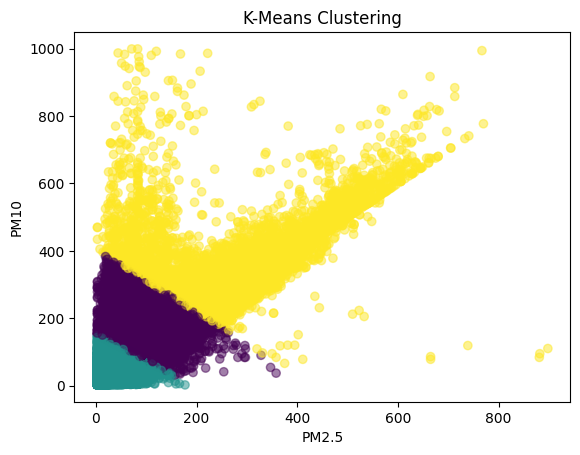

In [60]:
plt.scatter(data_test['PM2.5'], data_test['PM10'], c=labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()

Grafik ini merupakan hasil clustering dari PM10 dengan PM2.5 dengan diclusterkan menjadi 3 

## Clustering NO2 dengan CO

In [61]:
data_test_2 = data_df[["NO2", "CO"]]

In [62]:
kmeans.fit(data_test_2)
labels = kmeans.labels_

c:\Users\Juan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


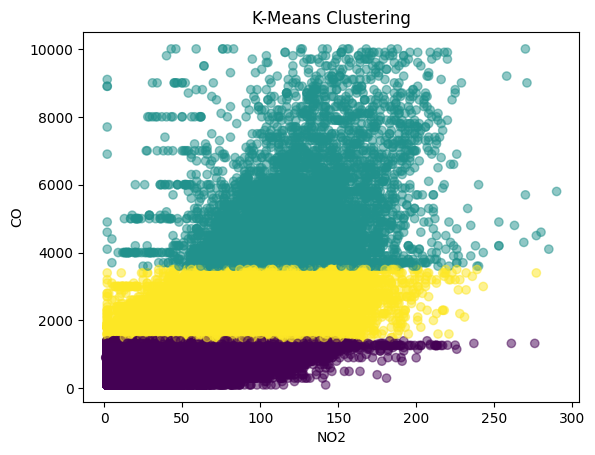

In [63]:
plt.scatter(data_test_2['NO2'], data_test_2['CO'], c=labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('NO2')
plt.ylabel('CO')
plt.show()

Grafik ini merupakan hasil clustering dari NO2 dengan CO dengan diclusterkan menjadi 3 bagian

## Time Series Analysis

In [64]:
data_df['date'] = pd.to_datetime(data_df[['year', 'month', 'day']])
data_df.set_index('date', inplace=True)
data_df.sort_index(inplace=True)

In [65]:
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,,,,,
2013-03-01,1,2013,3,1,0,4.0,4.0,4.0,7.000000,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,13,2013,3,1,12,9.0,10.0,8.0,55.871075,800.0,86.0,4.1,1025.1,-20.3,0.0,ENE,3.2,Gucheng
2013-03-01,14,2013,3,1,13,10.0,19.0,9.0,55.871075,900.0,86.0,5.3,1024.1,-20.1,0.0,NE,2.7,Gucheng
2013-03-01,15,2013,3,1,14,13.0,20.0,8.0,55.871075,800.0,88.0,5.5,1023.8,-20.0,0.0,NE,2.1,Gucheng
2013-03-01,16,2013,3,1,15,13.0,16.0,8.0,55.871075,800.0,90.0,6.3,1023.5,-19.3,0.0,ENE,2.7,Gucheng


In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2013-03-01 to 2017-02-28
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       175320 non-null  int64  
 1   year     175320 non-null  int64  
 2   month    175320 non-null  int64  
 3   day      175320 non-null  int64  
 4   hour     175320 non-null  int64  
 5   PM2.5    175320 non-null  float64
 6   PM10     175320 non-null  float64
 7   SO2      175320 non-null  float64
 8   NO2      175320 non-null  float64
 9   CO       175320 non-null  float64
 10  O3       175320 non-null  float64
 11  TEMP     175320 non-null  float64
 12  PRES     175320 non-null  float64
 13  DEWP     175320 non-null  float64
 14  RAIN     175320 non-null  float64
 15  wd       175320 non-null  object 
 16  WSPM     175320 non-null  float64
 17  station  175320 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 25.4+ MB


 Ini merupakan analisa lanjutan berupa time series untuk mengecek kandungan CO dihitung tiap bulan, pada setiap stasiun yang dianalisa

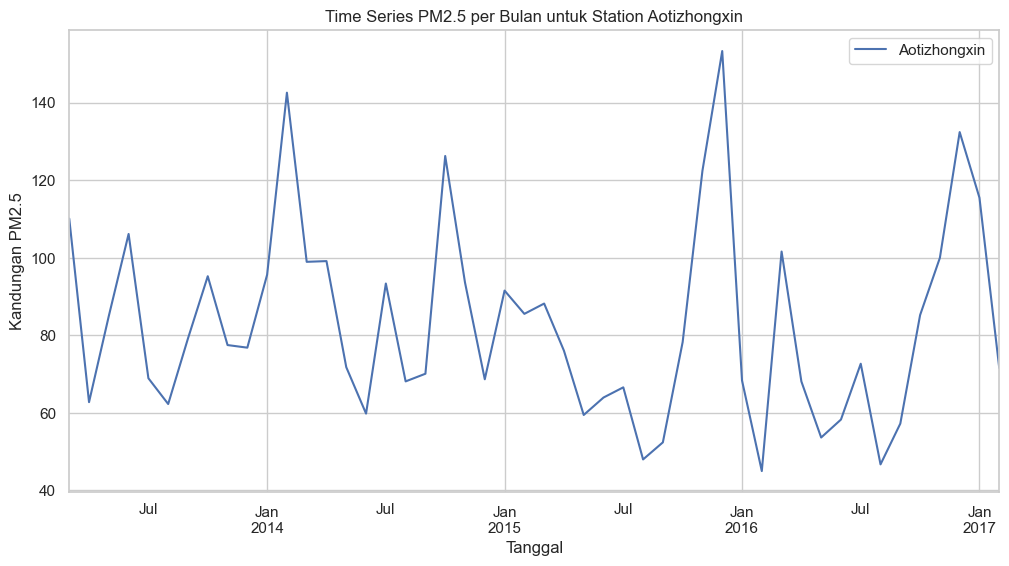

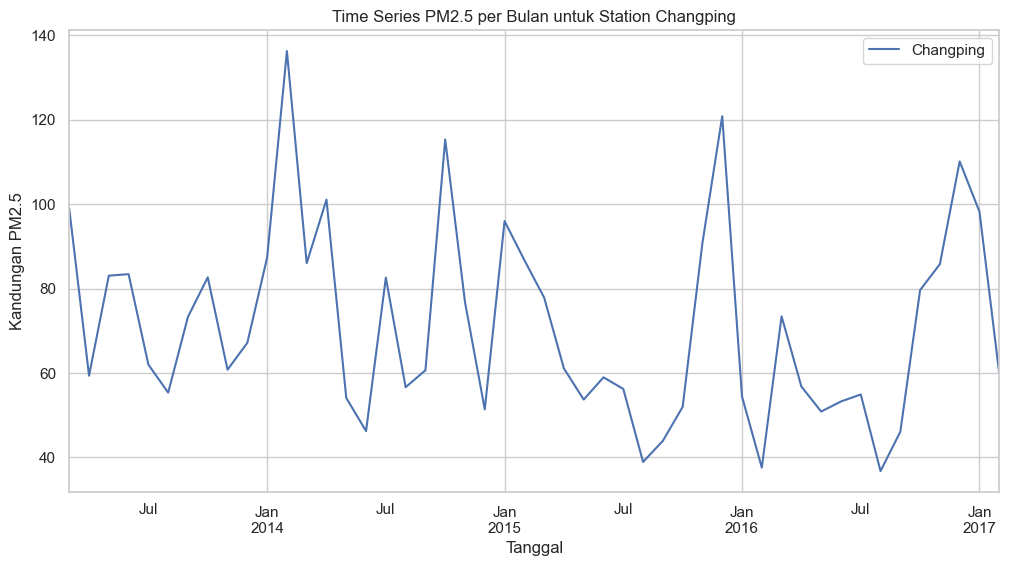

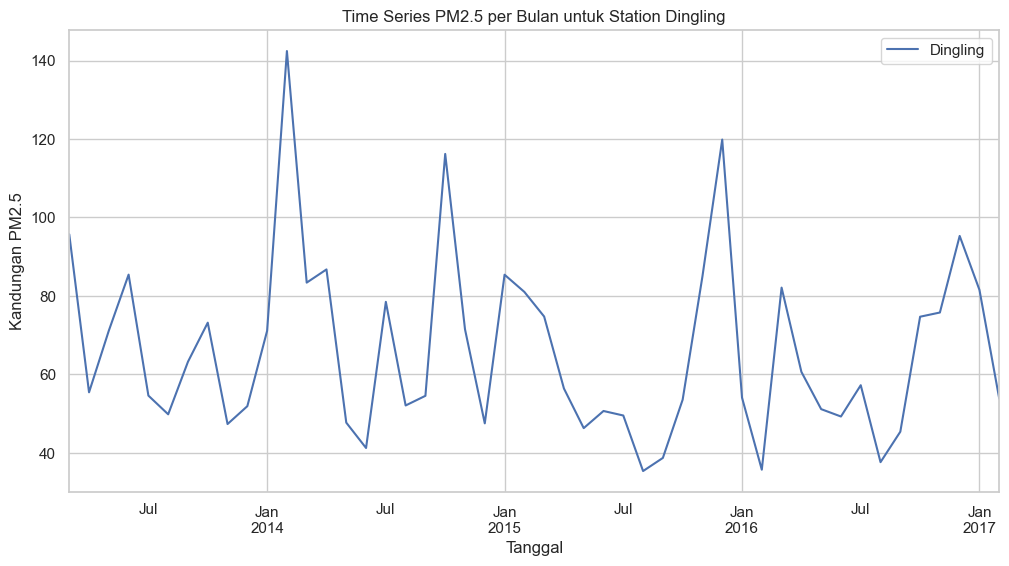

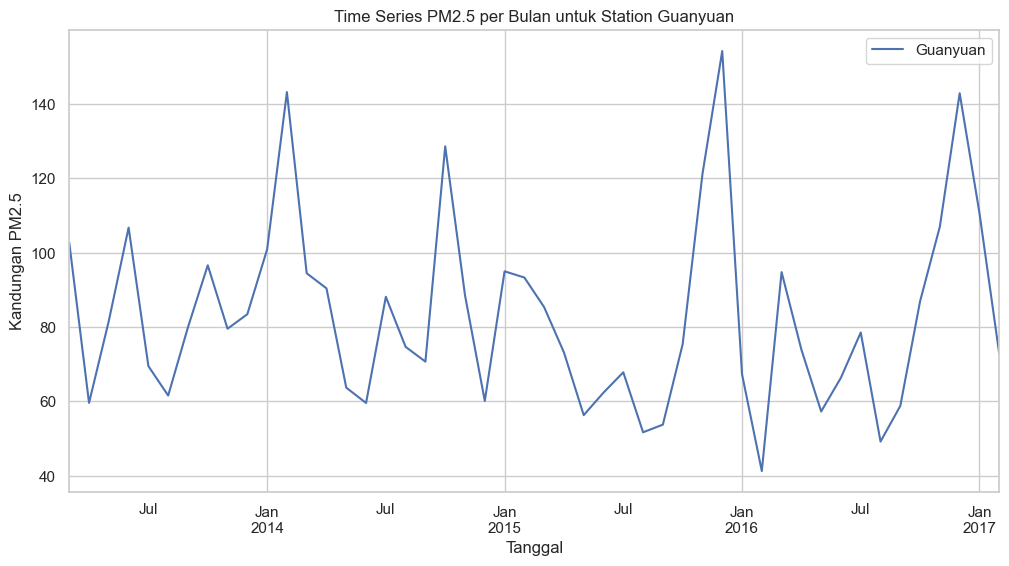

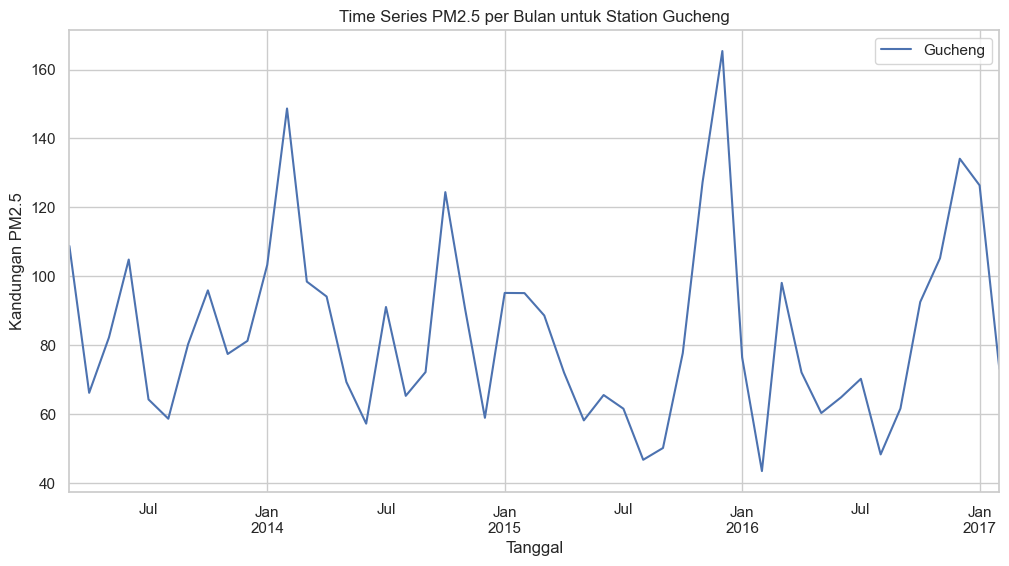

In [67]:
selected_columns = ['station', 'PM2.5']
df_selected = data_df[selected_columns]


for station, data in df_selected.groupby('station'):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    data.resample('M')['PM2.5'].mean().plot(label=station)
    plt.title('Time Series PM2.5 per Bulan untuk Station {}'.format(station))
    plt.xlabel('Tanggal')
    plt.ylabel('Kandungan PM2.5')
    plt.legend()
    plt.show()


Grafik ini menjelaskan tentang perkembangan atau Time series dari tingkat kandungan PM2.5 dihitung perbulan, untuk setiap stasiun yang di analisis

## Time Series dari CO setiap Station

 Ini merupakan analisa lanjutan berupa time series untuk mengecek kandungan CO dihitung tiap bulan, pada setiap stasiun yang dianalisa

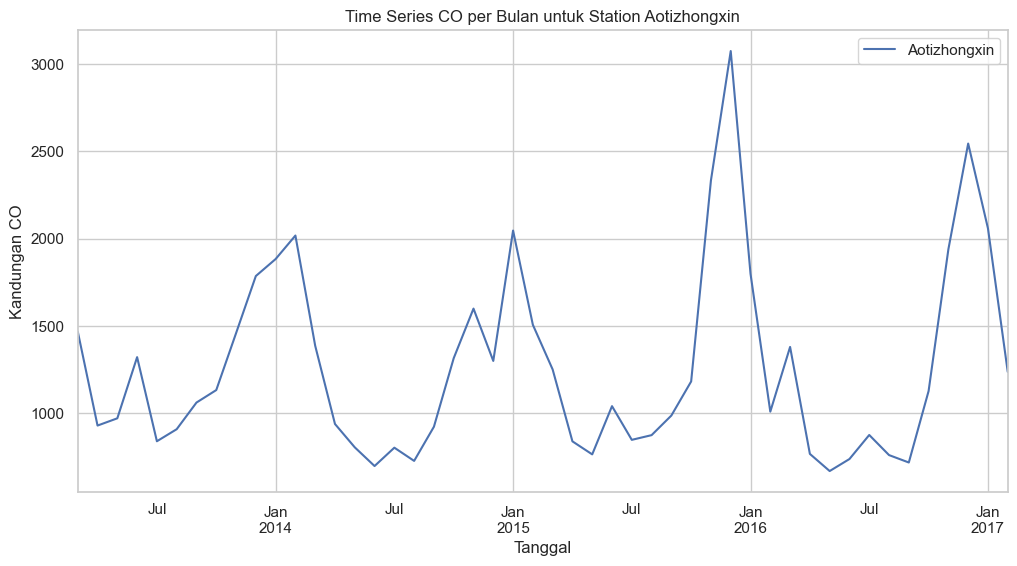

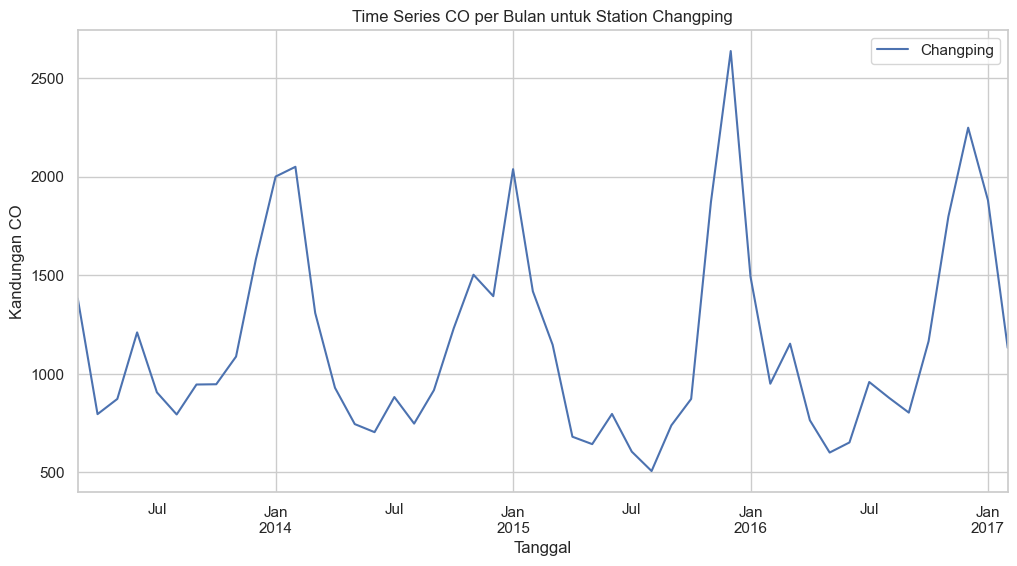

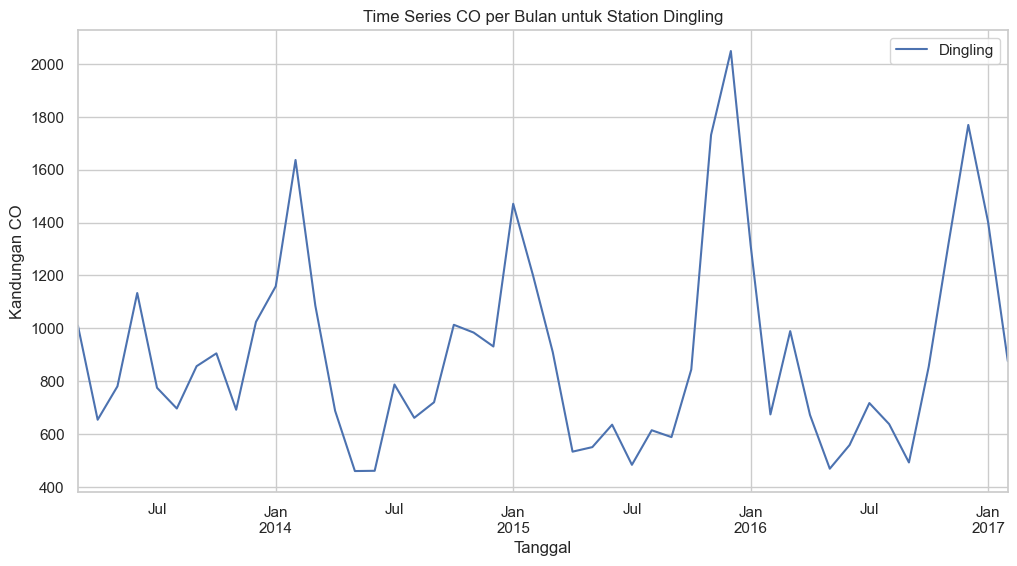

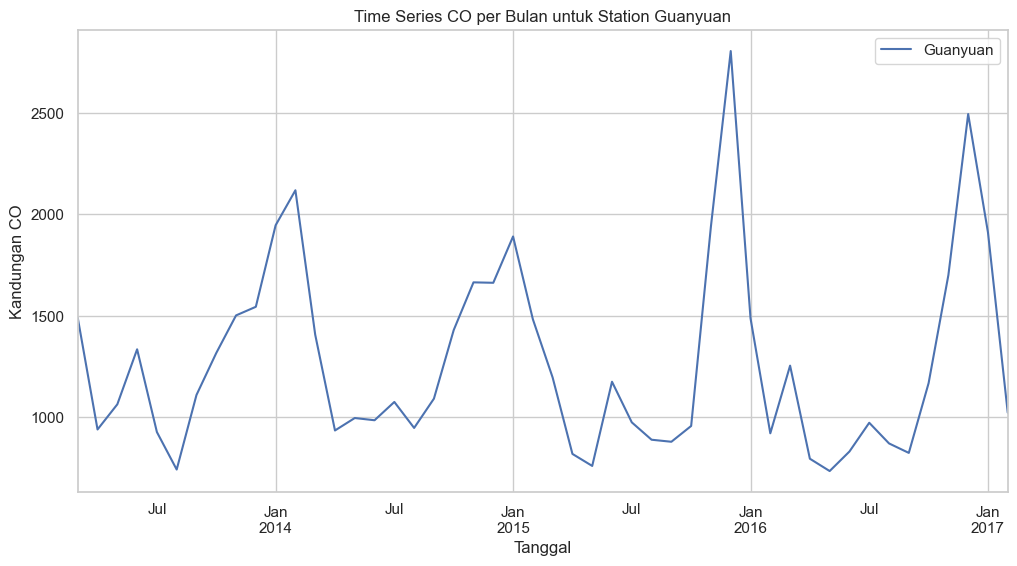

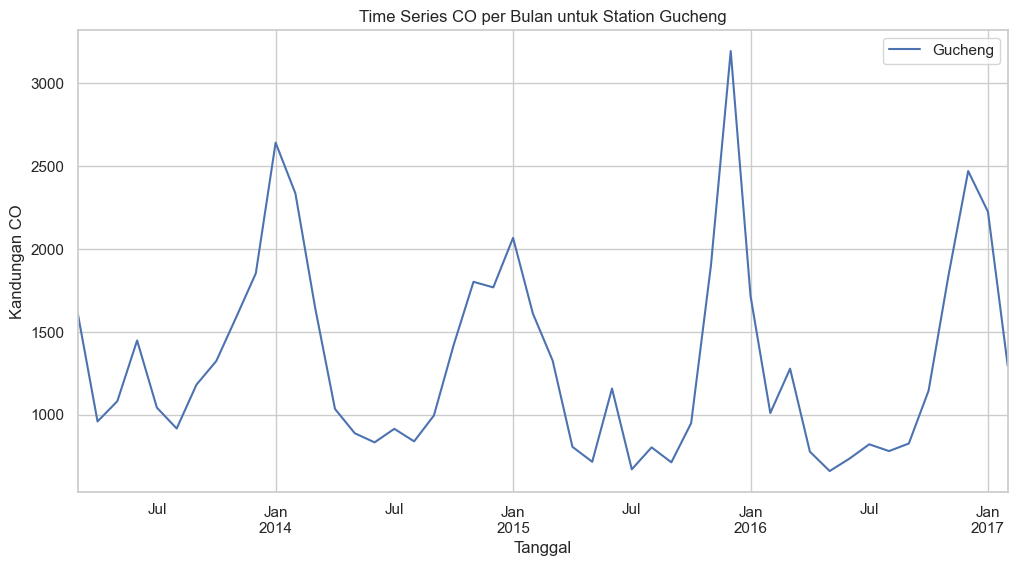

In [68]:
selected_columns = ['station', 'CO']
df_selected = data_df[selected_columns]

for station, data in df_selected.groupby('station'):
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")  
    data.resample('M')['CO'].mean().plot(label=station)
    plt.title('Time Series CO per Bulan untuk Station {}'.format(station))
    plt.xlabel('Tanggal')
    plt.ylabel('Kandungan CO')
    plt.legend()
    plt.show()

Grafik ini menjelaskan tentang perkembangan atau Time series dari tingkat kandungan CO dihitung perbulan, untuk setiap stasiun yang di analisis

# Visualization & Explanatory Analysis

##### Pertanyaan 1 : Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015?

In [69]:
max_pm_2015 = data_df[data_df["year"] == 2015].groupby(by=["station"]).agg({
    "PM2.5" : "max"
})

max_pm_2015

,PM2.5
station,
Aotizhongxin,657.0
Changping,500.0
Dingling,647.0
Guanyuan,680.0
Gucheng,741.0


C:\Users\Juan\AppData\Local\Temp\ipykernel_9452\108562798.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PM2.5",y="station", data=max_pm_2015.sort_values(by="PM2.5", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\Juan\AppData\Local\Temp\ipykernel_9452\108562798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PM2.5",y="station",data=max_pm_2015.sort_values(by="PM2.5", ascending=True).head(5), palette=colors, ax=ax[1])


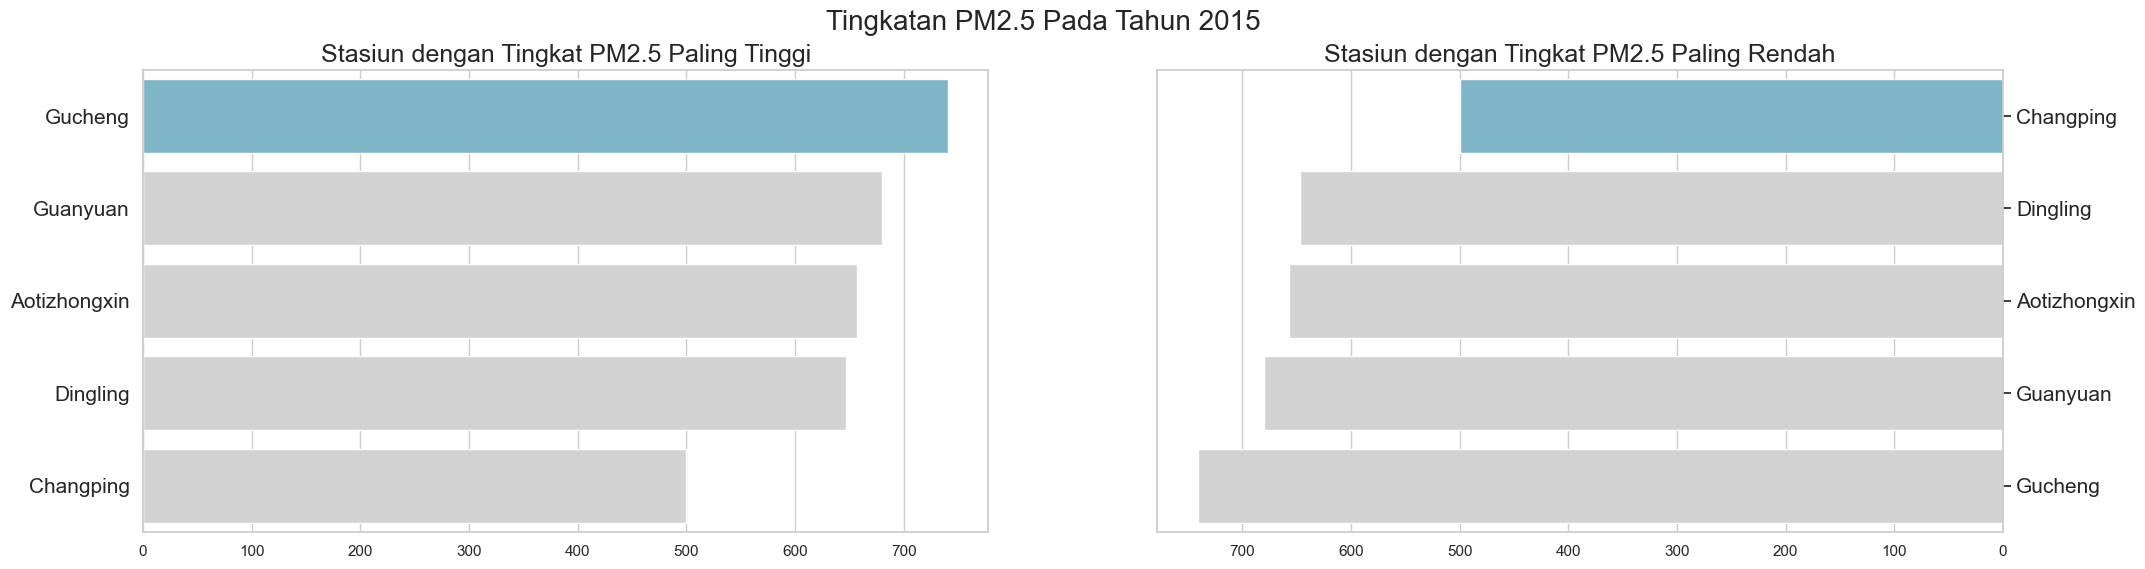

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="PM2.5",y="station", data=max_pm_2015.sort_values(by="PM2.5", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Stasiun dengan Tingkat PM2.5 Paling Tinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)
     
sns.barplot(x="PM2.5",y="station",data=max_pm_2015.sort_values(by="PM2.5", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Stasiun dengan Tingkat PM2.5 Paling Rendah", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Tingkatan PM2.5 Pada Tahun 2015", fontsize=20)
plt.show()

Dapat dilihat pada grafik diatas, Tingkat PM2.5 yang paling tertinggi pada tahun 2015 adalah Gucheng dimana Tingkat PM2.5 yang paling rendah merupakan Changping.

#### Pertanyaan 2 : Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Aotizhongxin?

In [71]:
tingkat_perkembangan = data_df[data_df["station"]=="Aotizhongxin"].groupby(by=["year"]).agg({
    "PM2.5":"mean",
    "PM10":"mean"
})
tingkat_perkembangan

,PM2.5,PM10
year,,
2013,82.393043,112.913167
2014,90.333581,121.389921
2015,82.134578,112.035381
2016,74.279022,94.842749
2017,94.626679,107.357984


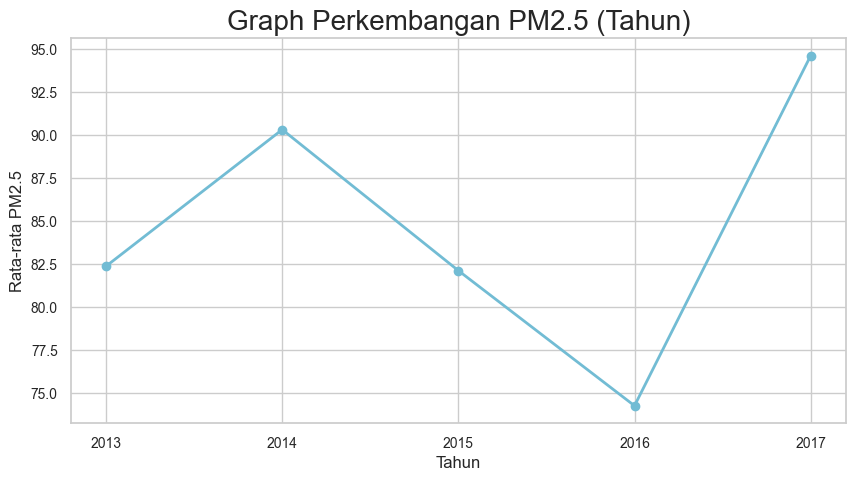

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(
    tingkat_perkembangan.index,
    tingkat_perkembangan["PM2.5"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Graph Perkembangan PM2.5 (Tahun)", loc="center", fontsize=20)
plt.xlabel("Tahun", fontsize=12)  
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(ticks=tingkat_perkembangan.index, labels=[str(int(year)) for year in tingkat_perkembangan.index], fontsize=10)
plt.show()

Grafik ini menunjukkan bahwa konsentrasi PM2.5 di China yang mengalami peningkatan dari tahun ke tahun. Rata-rata konsentrasi PM2.5 pada tahun 2013 adalah 82,3 mikrogram per meter kubik. Angka ini meningkat menjadi 90.3 mikrogram per meter kubik pada tahun 2014, 82,1 mikrogram per meter kubik pada tahun 2015, dan 74.2 mikrogram per meter kubik pada tahun 2016. Pada tahun 2017, konsentrasi PM2.5 mencapai titik tertingginya, yaitu 94,6 mikrogram per meter kubik.

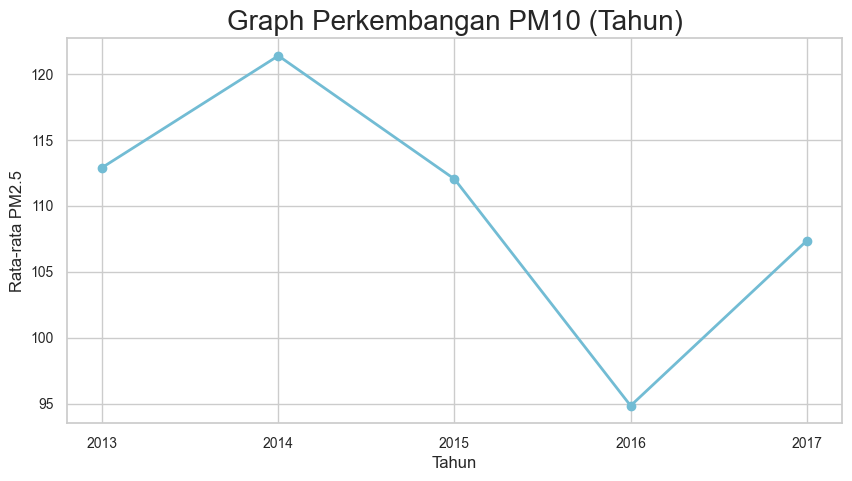

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(
    tingkat_perkembangan.index,
    tingkat_perkembangan["PM10"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Graph Perkembangan PM10 (Tahun)", loc="center", fontsize=20)
plt.xlabel("Tahun", fontsize=12)  
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(ticks=tingkat_perkembangan.index, labels=[str(int(year)) for year in tingkat_perkembangan.index], fontsize=10)
plt.show()

Grafik ini menunjukkan bahwa konsentrasi PM10 di China yang mengalami peningkatan dari tahun ke tahun. Rata-rata konsentrasi PM10 pada tahun 2013 adalah 112 mikrogram per meter kubik. Angka ini meningkat menjadi 121 mikrogram per meter kubik pada tahun 2014 dan menjadi titik tertingginya, 112 mikrogram per meter kubik pada tahun 2015, dan 94 mikrogram per meter kubik pada tahun 2016. Pada tahun 2017, konsentrasi PM2.5 mencapai 107 mikrogram per meter kubik.

#### Pertanyaan 3 : Apakah terdapat korelasi antara N02 terhadap SO2?

In [74]:
korelasi = data_df['NO2'].corr(data_df['SO2'])

print("Korelasi antara NO2 dan SO2:", korelasi)

Korelasi antara NO2 dan SO2: 0.4963243474149282


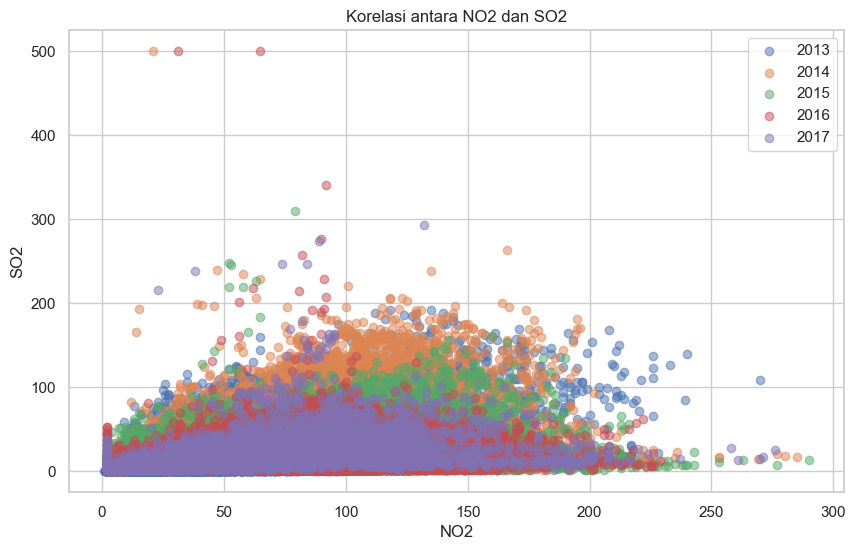

In [75]:
plt.figure(figsize=(10, 6))
for year in data_df['year'].unique():
    year_data = data_df[data_df['year'] == year]
    plt.scatter(year_data['NO2'], year_data['SO2'], label=year, alpha=0.5)

plt.xlabel('NO2')
plt.ylabel('SO2')
plt.title('Korelasi antara NO2 dan SO2')
plt.legend()
plt.show()

Berdasarkan grafik tersebut, terdapat korelasi antara NO2 dengan SO2. Hal ini dapat dilihat dari penyebaran titik-titik data yang menunjukkan pola linear. 

#### Conclusion:
- Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015? Stasiun Gucheng la yang menjadi kadar PM2.5 tertinggi di China dengan index mencapai 741 mkg/m^3 dan Stasiun kadar terendah merupakan Changping dengan index sebesar 500 mkg/m^3
- Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Aotizhongxin? 
Konsentrasi PM2.5 dan PM10 di China cenderung mengalami fluktuasi dari tahun ke tahun. Rata-rata konsentrasi PM2.5 tertinggi terjadi pada tahun 2017 dengan index sebesar 94, sedangkan rata-rata konsentrasi PM10 mencapai puncaknya pada tahun 2014 dengan index sebesar 121.
- Apakah terdapat korelasi antara N02 terhadap SO2? Ya ada, dapat dilihat terdapat korelasi antara NO2 dengan SO2. Hal ini dapat dilihat dari penyebaran titik-titik data yang menunjukkan pola linear. kita dapat melihat juga korelasi antara NO2 dengan SO2 sebesar 0.49632434741492754.